In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

## Generate Synthetic Dataset

In [2]:
np.random.seed(1234)
class_size = 10
X_benign = np.random.randn(class_size, 1) + 3 * 1.5
X_malignant = np.random.randn(class_size, 1) + 5.5 * 1.25
X = np.concatenate([X_benign, X_malignant])
y = np.concatenate([np.zeros(class_size), np.ones(class_size)])


In [3]:
def plot_data(X, y, ax):
  sns.scatterplot(x=X[:,0], y=y, marker='x', color='red', ax=ax);
  ax.set_xlim(0, 9);
def plot_hypothesis_function(theta_0, theta_1, ax):
  x = np.linspace(0, 9, 100);
  y = 1 / (1 + np.exp(-(theta_1 * x + theta_0)))
  sns.lineplot(x=x, y=y, color='green', ax=ax);

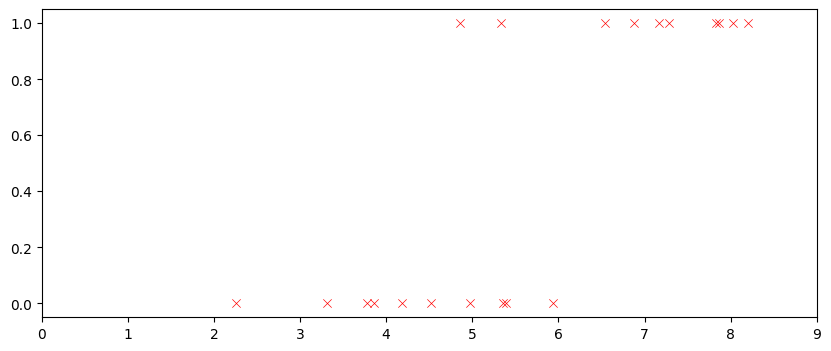

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,4));
plot_data(X, y, ax);

## Hypothesis Function

$y=\sigma(\theta_1 x_1 + \theta_0) = \frac{1}{1 + e^{-(\theta_1 x_1 + \theta_0)}}$

Parameters: $\theta_1$ and $\theta_0$

In [8]:
def plot(theta_0, theta_1):
  fig, ax = plt.subplots(1,1,figsize=(10,4));
  plot_data(X, y, ax);
  plot_hypothesis_function(theta_0, theta_1, ax)
widgets.interact(plot, theta_0=widgets.FloatText(), theta_1=widgets.FloatText());

interactive(children=(FloatText(value=0.0, description='theta_0'), FloatText(value=0.0, description='theta_1')…

## Parameters (vectorized form)

In [20]:
theta = [8, -2]

- Add a bias term to the feature matrix.

In [21]:
Xt = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
Xt

array([[1.        , 4.97143516],
       [1.        , 3.30902431],
       [1.        , 5.93270697],
       [1.        , 4.1873481 ],
       [1.        , 3.77941127],
       [1.        , 5.38716294],
       [1.        , 5.35958841],
       [1.        , 3.8634765 ],
       [1.        , 4.51569637],
       [1.        , 2.25731505],
       [1.        , 8.02503572],
       [1.        , 7.86694602],
       [1.        , 7.82832413],
       [1.        , 4.85374518],
       [1.        , 6.54092263],
       [1.        , 6.87711836],
       [1.        , 7.28045341],
       [1.        , 7.16409194],
       [1.        , 8.19615819],
       [1.        , 5.32809445]])

- Compute predictions (vectorized)

In [22]:
pred = 1 / (1 + np.exp(-(Xt @ theta)))
pred

array([1.25332860e-01, 7.99304219e-01, 2.05241782e-02, 4.07406741e-01,
       6.08539562e-01, 5.87274282e-02, 6.18512142e-02, 5.67840788e-01,
       2.62814181e-01, 9.70268620e-01, 3.18977345e-04, 4.37545575e-04,
       4.72666244e-04, 1.53489511e-01, 6.17013527e-03, 3.15931186e-03,
       1.41260406e-03, 1.78209157e-03, 2.26550436e-04, 6.56085834e-02])

<AxesSubplot:>

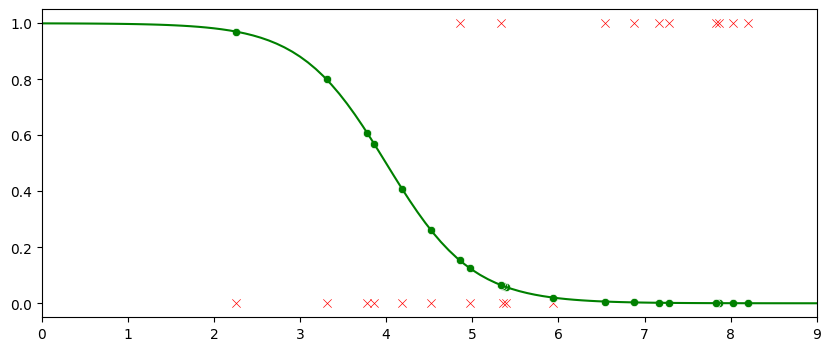

In [23]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
plot_data(X, y, ax);
plot_hypothesis_function(theta[0], theta[1], ax=ax);
sns.scatterplot(x=Xt[:,1], y=pred, color='green')

- Compute loss

In [24]:
loss = -(y * (np.log(pred)) + (1 - y) * (np.log(1 - pred))).sum()
loss

68.17580995699484

- Gradient Descent

In [25]:
alpha = 0.01

In [26]:
grad = ((pred - y) @ Xt)
grad

array([ -5.88431223, -55.15528442])

In [27]:
theta = theta - alpha * grad
theta

array([ 8.05884312, -1.44844716])

In [28]:
pred = 1 / (1 + np.exp(-(Xt @ theta)))
pred

array([0.70223886, 0.96324014, 0.36949837, 0.88013305, 0.92986162,
       0.56360904, 0.57340631, 0.92149258, 0.82025787, 0.99174987,
       0.02751838, 0.0343562 , 0.03626125, 0.73661523, 0.19539353,
       0.12984845, 0.07680938, 0.08964596, 0.02160774, 0.58452567])

In [29]:
loss = -(y * (np.log(pred)) + (1 - y) * (np.log(1 - pred))).sum()
loss

44.104839974349375

<AxesSubplot:>

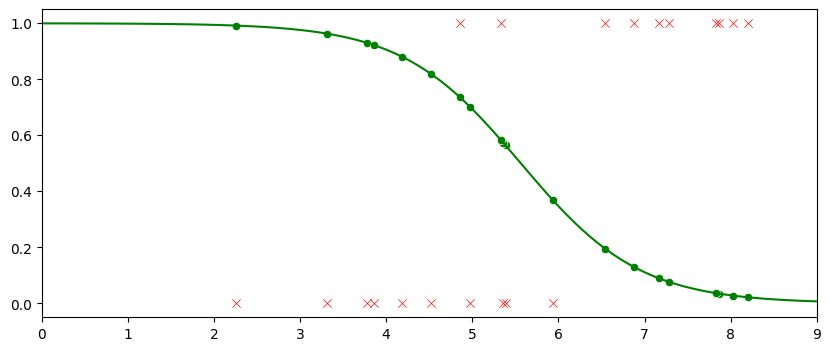

In [30]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
plot_data(X, y, ax);
plot_hypothesis_function(theta[0], theta[1], ax=ax);
sns.scatterplot(x=Xt[:,1], y=pred, color='green')

In [31]:
thetas = []
losses = []
for i in range(10000):
  pred = 1 / (1 + np.exp(-(Xt @ theta)))
  loss = -(y * (np.log(pred)) + (1 - y) * (np.log(1 - pred))).sum()
  grad = ((pred - y) @ Xt)
  theta = theta - alpha * ((pred - y) @ Xt)
  thetas.append(theta)
  losses.append(loss)
  print(loss)
summary = pd.DataFrame({'theta':thetas, 'loss': losses})

44.104839974349375
39.869300139762224
39.707504922366056
39.55408554009859
39.401144247834374
39.24846066180177
39.09602944498122
38.94385221508407
38.791930834570856
38.640267182630055
38.48886314848056
38.33772063084857
38.186841537925886
38.0362277872921
37.88588130584189
37.73580402970759
37.585997904177916
37.4364648836139
37.28720693136046
37.13822601965464
36.98952412953007
36.84110325071727
36.69296538154067
36.54511252881091
36.39754670771356
36.25026994169377
36.10328426233635
35.95659170924208
35.81019432989938
35.664094179551704
35.51829332106041
35.37279382476343
35.22759776832881
35.082707236604236
34.93812432146119
34.79385112163501
34.64988974255939
34.50624229619673
34.362910900862744
34.219897681046724
34.07720476722615
33.93483429567653
33.79278840827577
33.65106925230343
33.50967898023446
33.36861974952775
33.227893722408965
33.087503065648164
32.94744995033159
32.80773655162794
32.66836504854904
32.52933762370468
32.39065646305169
32.252323755637306
32.114341693336

In [32]:
summary

,theta,loss
0,"[8.062362427338112, -1.1758089826341858]",44.104840
1,"[8.025653999853978, -1.1561053799855858]",39.869300
2,"[7.98657075360455, -1.1528287633630157]",39.707505
3,"[7.947930426149608, -1.1467400028565506]",39.554086
4,"[7.909247560554644, -1.1411629044622835]",39.401144
...,...,...
9995,"[-11.339167785555496, 2.0131671363039785]",5.569938
9996,"[-11.339206925000603, 2.0131740921568433]",5.569938
9997,"[-11.339246049413633, 2.0131810453398318]",5.569938
9998,"[-11.339285158800497, 2.0131879958539924]",5.569937


<AxesSubplot:>

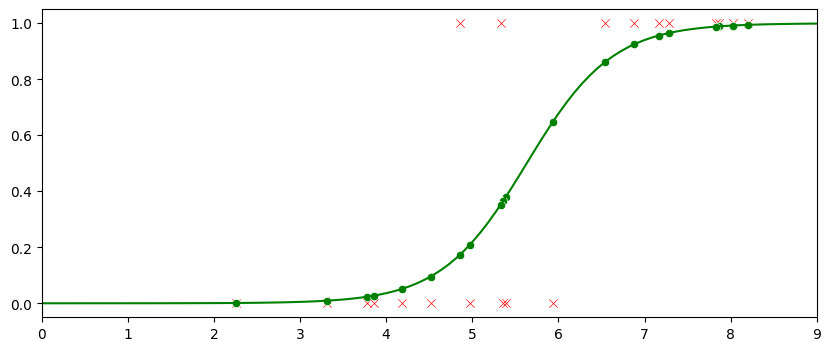

In [33]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
plot_data(X, y, ax);
plot_hypothesis_function(theta[0], theta[1], ax=ax);
sns.scatterplot(x=Xt[:,1], y=pred, color='green')

C:\Users\thoma\AppData\Local\Temp\ipykernel_11024\4145678440.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,1,figsize=(3,1.5))


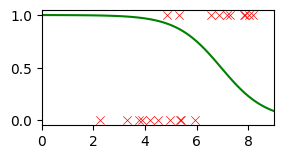

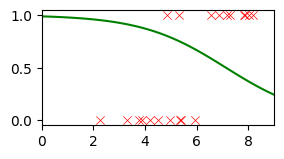

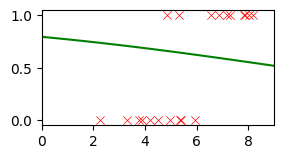

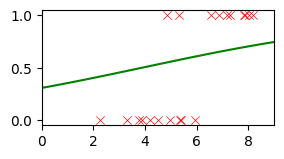

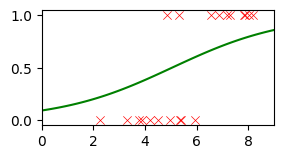

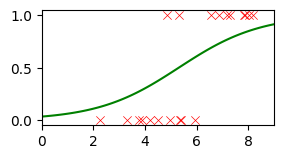

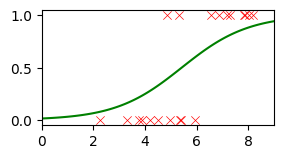

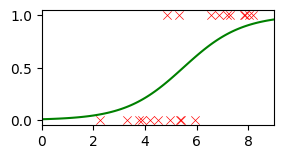

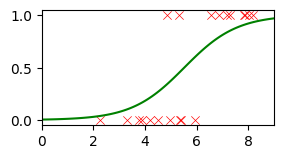

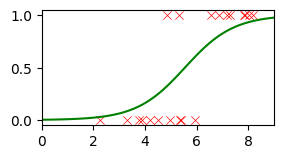

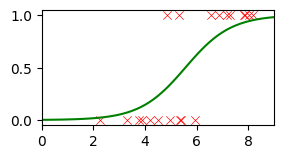

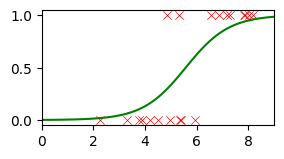

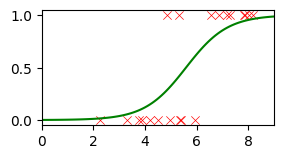

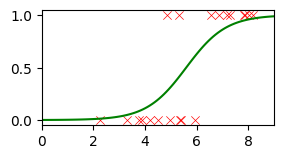

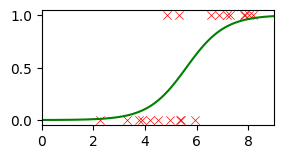

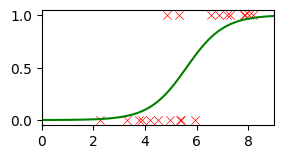

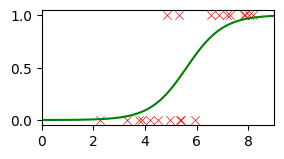

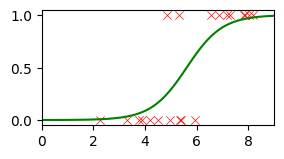

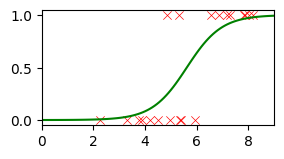

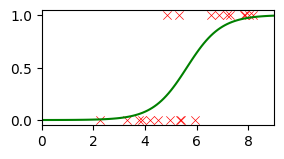

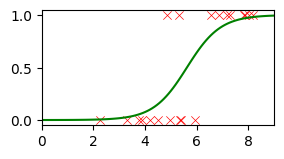

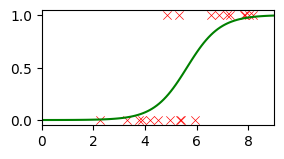

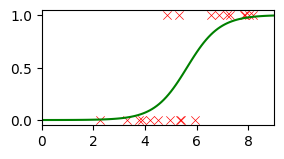

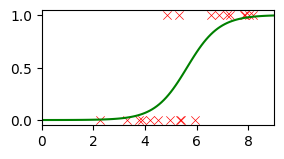

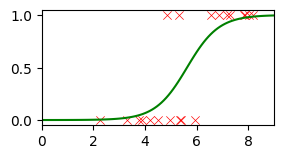

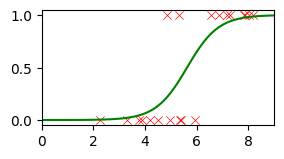

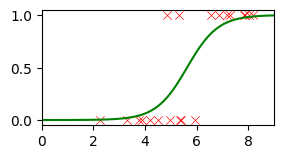

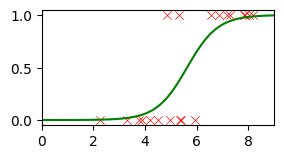

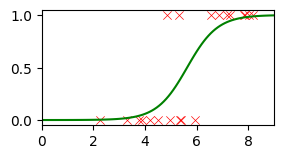

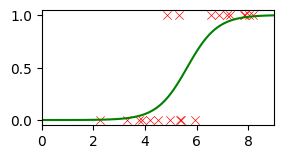

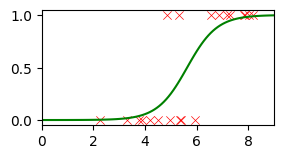

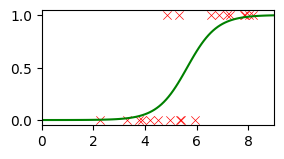

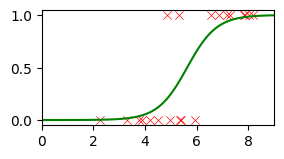

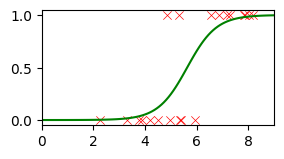

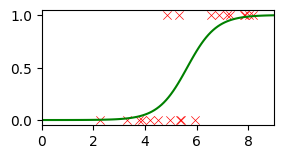

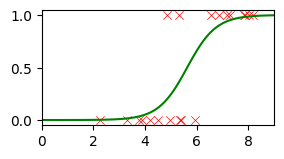

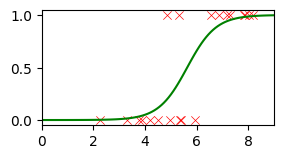

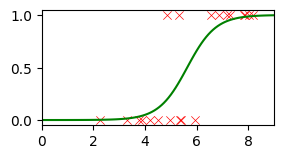

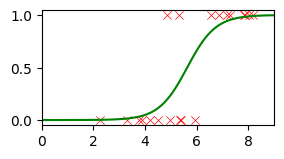

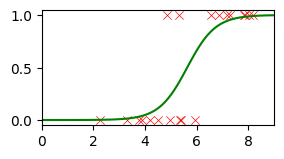

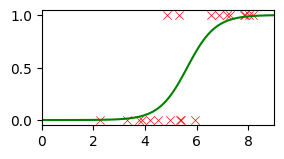

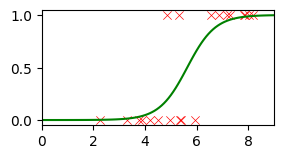

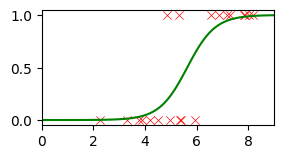

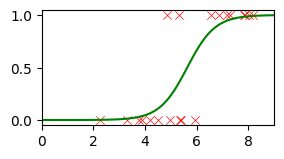

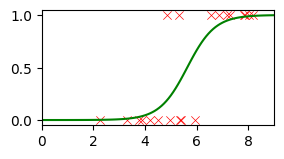

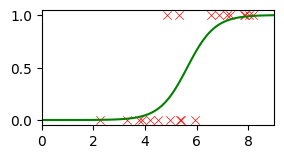

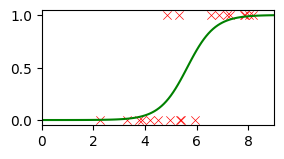

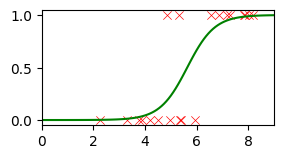

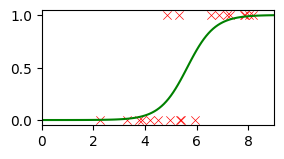

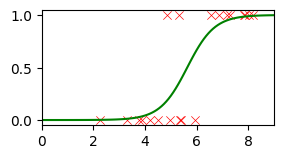

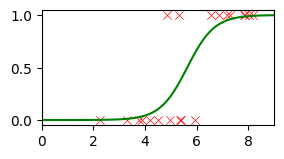

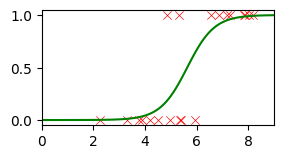

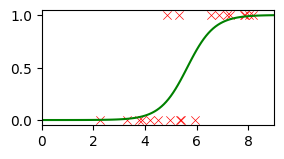

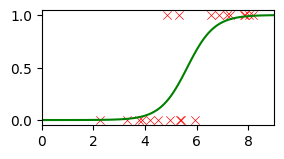

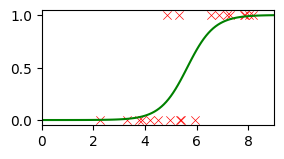

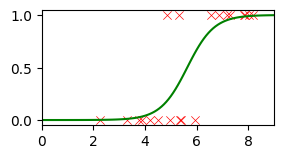

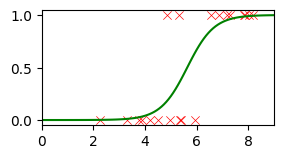

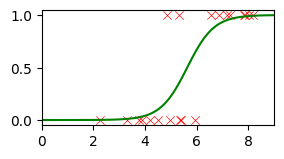

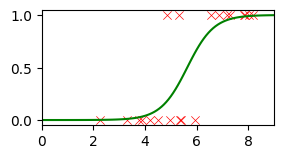

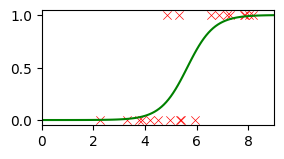

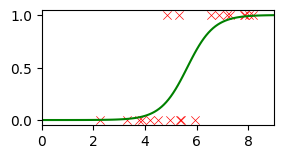

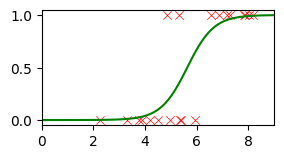

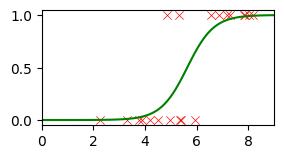

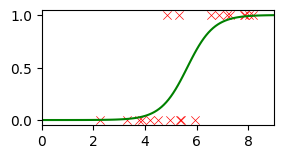

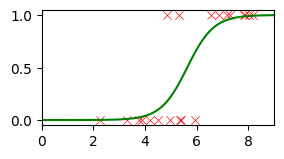

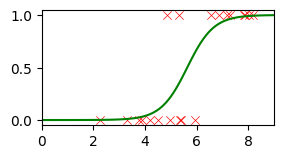

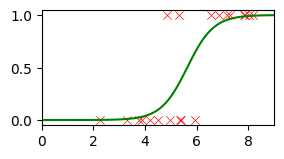

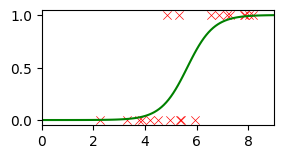

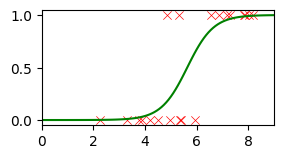

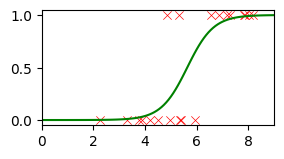

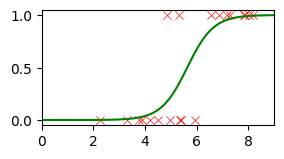

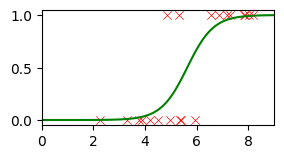

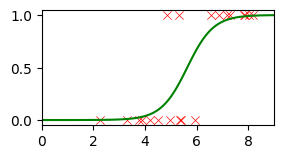

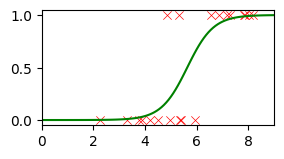

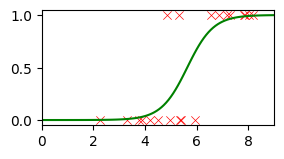

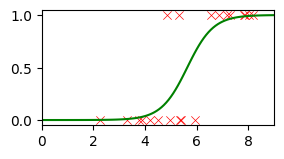

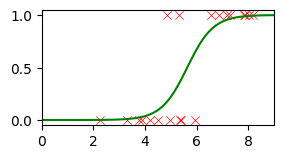

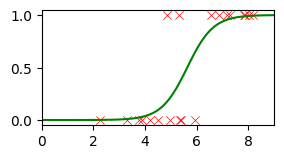

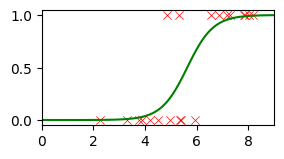

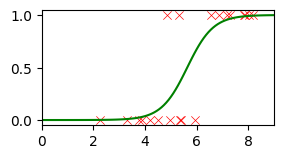

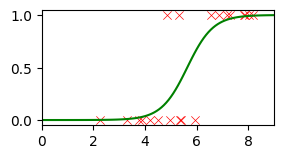

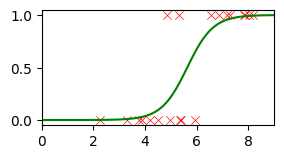

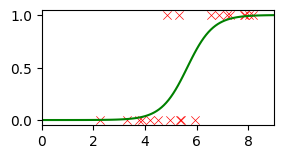

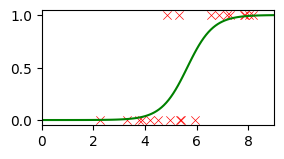

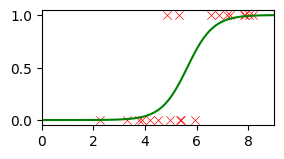

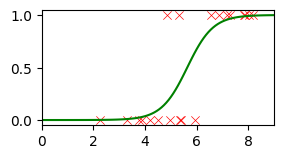

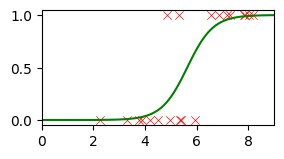

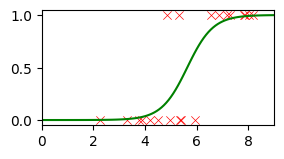

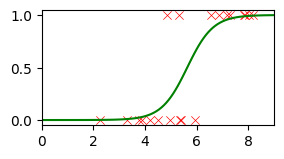

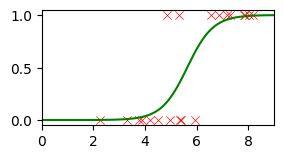

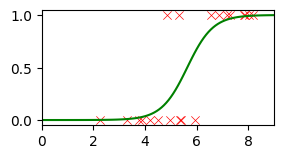

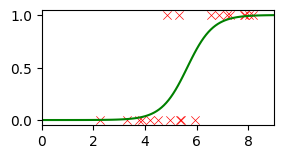

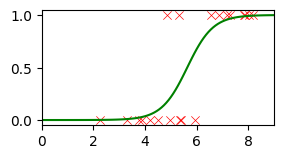

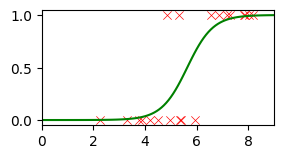

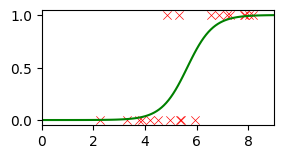

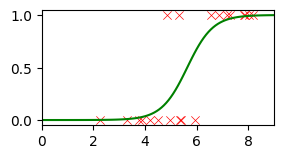

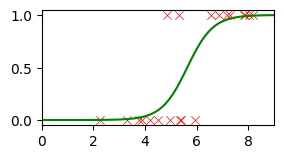

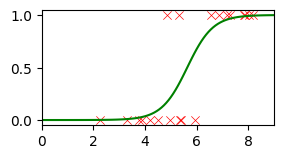

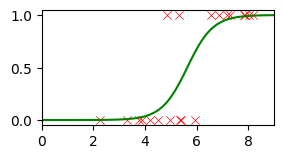

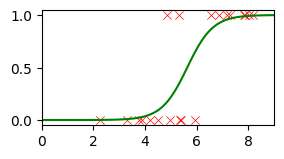

In [34]:
for i in range(1,10000,100):
  fig,ax=plt.subplots(1,1,figsize=(3,1.5))
  plot_data(X, y, ax);
  plot_hypothesis_function(summary.iloc[i]['theta'][0], summary.iloc[i]['theta'][1], ax);